###### Prepared By:
James Salafatinos

9/20/20
###### Git Repo:
https://github.com/james-salafatinos/data-engineering

# Executive Summary

Search algorithms are fundamental aspects to computer science and data engineering. Two strategies for searching arrays are with a Binary Search or a Linear Search; each method has advantages over the other. A Binary Search scales well to large arrays, but requires the array to be sorted. When performing a Binary search scaling from array size of 512 to 320000, the Binary search time grows logarithmically meaning it's time performance shows as the array size gets larger; for small arrays this method does not show its ability, but as the array grows, a binary search is one of the fastest searching methods capable of finding a single value in a 32768 length array in less than .01 millisecond on average. It achieves these speeds by dividing and conquering the array, quickly narrowing in on the searched value (if it exists). By first picking the middle index, the algorithm first asks if the middle index "guess" is smaller or larger than the desired search item. If smaller, the algorithm then forgets about any value that is larger, recalibrates it's window of observation and again picks the middle of the smaller half of the original array asking if it's new "guess" is smaller or larger than the desired search item. The cycle repeats a surprisingly small amount of times (the logarithm of the length of the array) until either the item is found or the array cannot be split in half again. This unrivaled speed however requires that the array be sorted, which is not always the easiest computational task. Despite the impressive search time of a binary search given a sorted array, if we take into account the amount of time to sort the array, any efficiencies gained in the binary search are lost due to the need to sort the array is expensive in comparison. 

A binary search is good when:
- We need to make many search calls 
- The search space is large
- The search calls need to be extremely fast
- We can afford a large computation investment up front to sort the array (if not sorted)
- We can maintain a sorted array

Time Complexity
- Best Case: $O(1)$
- Worst Case: $O(log$ $n)$
- Average Case: $O(log$ $n)$


In some cases, a different search method may be preferred - the linear search. At relatively small array sizes, the computation time may be indistinguishable between a binary search and a linear search. A linear search is much simpler and has the ability to run on arrays that have not been sorted giving it a solid use case for computationally flexible search tasks. A linear search works simply by going through each element in the array, one by one, and asking "is this it?" For small arrays this works exceptionally well and very similar in computation time to the binary search. However, as the array size grows, the time-complexity changes linearly with the size of the array meaning that if it takes .15 miliseconds to search a 2048 size array, it will take .30 miliseconds to search a 4096 size array. 

A linear search is good when:
- We have small arrays to search through
- The arrays are not sorted, and the array isn't too large
- Simplicity

Time Complexity
- Best Case: $O(1)$
- Worst Case: $O(n)$
- Average Case: $O(n)$

### Summary of time-complexity for search algorithms

|O Notation| $O(1)$  	|$O(log(n))$| $O(n)$  	|$O(n^2)$   	| $O(2^n)$  	|   
|---|---	|---	|---	|---	|---	|
|Time-Complexity|   Constant	| Logarithmic  	|  Linear 	|   Quadratic	|  Exponential  	|
|Description|  Instant	|   Scales well	|   1:1 size to performance	|  Becomes computationally expensive, fast 	|   Becomes impossibly expensive, faster	|
|Search Algorithm Average Case | N/A	|  Binary Search 	|  Linear Search 	|   N/A	|   N/A	|





# Setup

## Imports and sample data generation
To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
%load_ext autoreload
%autoreload 2

np.random.seed = 34 #set seed
LOG = {} # Define Log

#Define Data
r_1 = np.random.randint(1,10000, 2**9)
r_2 = np.random.randint(1,10000, 2**10)
r_3 = np.random.randint(1,10000, 2**11)
r_4 = np.random.randint(1,10000, 2**12)
r_5 = np.random.randint(1,10000, 2**13)
r_6 = np.random.randint(1,10000, 2**14)
r_7 = np.random.randint(1,10000, 2**15)

## Timing Function
- We use a timing wrapper around each search algorithm to log the computation time in miliseconds


In [3]:
def timeit(log):
    """ Wraps functions needing timing provided a dictionary to dump into based on function name"""
    def log_it(func):
        def wrapped(*args, **kw):
            ts = time.time_ns() // 1000000 
            result = func(*args, **kw)
            te = time.time_ns() // 1000000 
            if func.__name__ in log.keys():
                log[func.__name__].append(te-ts)
            else:
                log[func.__name__] = [te-ts]
            return result
        return wrapped
    return log_it

# Search Algorithms


## Binary Search
- Binary Search
    - Requires sorted array

In [4]:
@timeit(LOG)
def binary_search(arr, item):
    """
    Returns the index of the item if found, otherwise None. Time-complexity = O(log n)
    Parameters
    ----------
        arr : list, array
            the array to look in
        item : int, float
            the item to find
    """
    high_idx = len(arr)-1
    low_idx = 0

    while low_idx <= high_idx:
        mid_idx = (low_idx + high_idx)//2
        guess = arr[mid_idx]
        if guess == item:
            return mid_idx
        if guess > item:
            high_idx = mid_idx - 1
        else:
            low_idx = mid_idx + 1
    return None

# Linear Search


- Linear Search
    - Can work on non sorted array
    

In [5]:
@timeit(LOG)
def linear_search(arr, item):
    """
    Returns the index of item in array if found, otherwise None. Time-complexity = O(n)
    Parameters
    ----------
        arr : list, array
            the array to look in
        item : int, float
            the item to find
    """
    for i,potential in enumerate(arr):
        if item == potential:
            return i
        else:
            continue
    return None

# Sorting Algorithms

## Quick Sort
- The below implementation of quick sort is non optimal as it does not choose the pivot as the median

In [6]:
@timeit(LOG)
def total_qsort(arr):
    def qsort(arr):
        """
        Returns a sorted array. Time-complexity = O(n log n)
        Parameters
        ----------
            arr : list, array
                the array to sort
        """
        #Base case  (already sorted)
        if len(arr) < 2:
            return arr
        #Recursive case
        else:
            pivot = arr[0]
            less = [i for i in arr[1:] if i <= pivot]
            greater = [i for i in arr[1:] if i > pivot]
            return qsort(less) + [pivot] + qsort(greater)
    return qsort(arr)

## Python native sort implementation
- Much faster than the qsort implementation above at $O(n$ $ log$ n $)$

In [7]:
@timeit(LOG)
def native_sort(arr):
    return sorted(arr)

# Experiment

In [8]:
trials = 100 #Trials of experiment
arrays = [r_1,r_2,r_3,r_4,r_5, r_6,r_7] #Raw data

#Largest numbers in rando mdata arrays
r_1_max = max(r_1)
r_2_max = max(r_2)
r_3_max = max(r_3)
r_4_max = max(r_4)
r_5_max = max(r_5)
r_6_max = max(r_6)
r_7_max = max(r_7)

#Future search term for experiment
search_item = [r_1_max,r_2_max,r_3_max,
               r_4_max,r_5_max,r_6_max,r_7_max]


## Recording sort time for 100 trials of each array size
- We will perform 100 trials of the qsort implementation above, and the native python sorted() function. The time it takes for these functions to execute will be logged 100 times.

In [9]:
#Sorting the arrays, putting in container, tracking time
sorted_arrays = []
for each_array in arrays:
    for trial in range(trials):
        s_a = total_qsort(each_array)
    sorted_arrays.append(s_a)
    
#Sorting the arrays, putting in container, tracking time    
sorted_arrays_native = []
for each_array in arrays:
    for trial in range(trials):
        s_a = native_sort(each_array)
    sorted_arrays_native.append(s_a)

## Recording search time for 100 trials over sorted arrays

In [10]:
#Binary Search
for idx,array in enumerate(sorted_arrays):
    for trial in range(trials):
        binary_search(array, search_item[idx])
        
#Linear Search
for idx,array in enumerate(sorted_arrays):
    for trial in range(trials):
        linear_search(array, search_item[idx])

# Results

Binary Search is incredibly fast, barely moving the milisecond needle when the array has already been sorted. Linear search on the otherhand scales linearly with the size of the array. When the sort times are added to the binary search, the linear search is preferred in terms of computation time. This is partly because we sorting algorithms are inherently more expensive. Notice that on the very small array sizes (512, 1024), the linear and binary searches are very comparable in ability, but as the array grows, the binary search shows its performance well. 

On another note, python's implementation of a sorting algorithm is much better than my first implementation of the quicksort algorithm. 

In [11]:
df = pd.DataFrame({'Array Length': sorted(list(map(len, arrays))*trials),
                   'qsort': LOG['total_qsort'],
                   'native_sort': LOG['native_sort'],
                   'binary':LOG['binary_search'],
                   'linear':LOG['linear_search'], 
                   'binary_plus_qsort': np.array(LOG['total_qsort']) + np.array(LOG['binary_search']),
                   'binary_plus_native_sort': np.array(LOG['native_sort']) + np.array(LOG['binary_search'])})


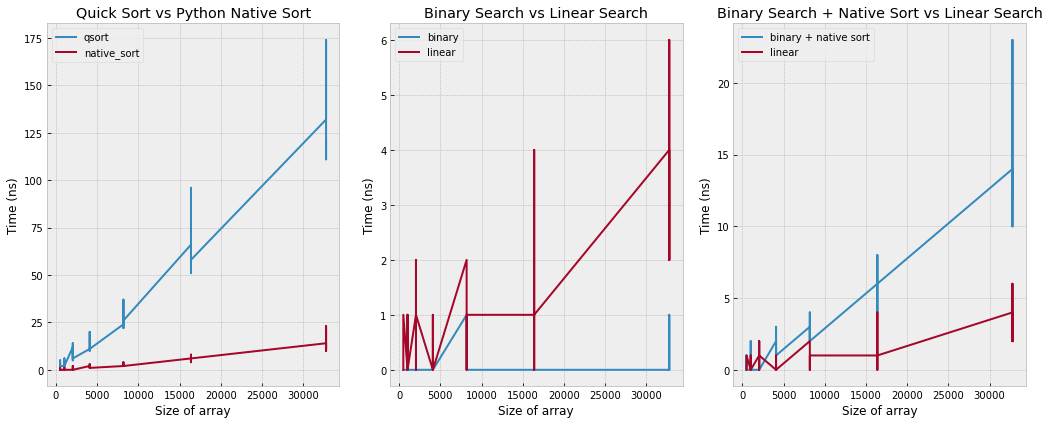

In [12]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
ax1,ax2,ax3 = axes.flatten()

ax1.plot(df['Array Length'], df['qsort'], label = 'qsort')
ax1.plot(df['Array Length'], df['native_sort'], label = 'native_sort')
ax1.set_title('Quick Sort vs Python Native Sort')
ax1.set_xlabel('Size of array')
ax1.set_ylabel('Time (ns)')
ax1.legend()

ax2.plot(df['Array Length'], df['binary'], label = 'binary')
ax2.plot(df['Array Length'], df['linear'], label = 'linear')
ax2.set_title('Binary Search vs Linear Search')
ax2.set_xlabel('Size of array')
ax2.set_ylabel('Time (ns)')
ax2.legend()



ax3.plot(df['Array Length'], df['binary_plus_native_sort'], label = 'binary + native sort')
ax3.plot(df['Array Length'], df['linear'], label = 'linear')
ax3.set_title('Binary Search + Native Sort vs Linear Search')
ax3.set_xlabel('Size of array')
ax3.set_ylabel('Time (ns)')
ax3.legend()

plt.tight_layout()




In [13]:
df = df.groupby(['Array Length']).agg(np.mean).reset_index()
df

,Array Length,qsort,native_sort,binary,linear,binary_plus_qsort,binary_plus_native_sort
0,512,1.75,0.11,0.00,0.04,1.75,0.11
1,1024,2.82,0.26,0.01,0.10,2.83,0.27
2,2048,5.76,0.56,0.00,0.21,5.76,0.56
3,4096,13.35,1.25,0.00,0.37,13.35,1.25
4,8192,26.82,2.47,0.01,0.70,26.83,2.48
5,16384,61.68,5.80,0.00,1.55,61.68,5.80
6,32768,128.38,12.72,0.01,2.88,128.39,12.73


In [14]:
df.T

,0,1,2,3,4,5,6
Array Length,512.00,1024.00,2048.00,4096.00,8192.00,16384.00,32768.00
qsort,1.75,2.82,5.76,13.35,26.82,61.68,128.38
native_sort,0.11,0.26,0.56,1.25,2.47,5.80,12.72
binary,0.00,0.01,0.00,0.00,0.01,0.00,0.01
linear,0.04,0.10,0.21,0.37,0.70,1.55,2.88
binary_plus_qsort,1.75,2.83,5.76,13.35,26.83,61.68,128.39
binary_plus_native_sort,0.11,0.27,0.56,1.25,2.48,5.80,12.73


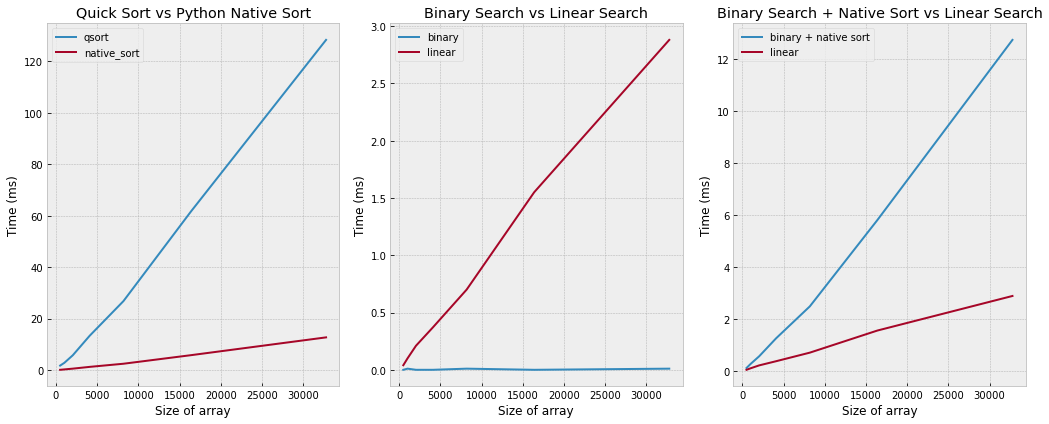

In [15]:

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
ax1,ax2,ax3 = axes.flatten()

ax1.plot(df['Array Length'], df['qsort'], label = 'qsort')
ax1.plot(df['Array Length'], df['native_sort'], label = 'native_sort')
ax1.set_title('Quick Sort vs Python Native Sort')
ax1.set_xlabel('Size of array')
ax1.set_ylabel('Time (ms)')
ax1.legend()

ax2.plot(df['Array Length'], df['binary'], label = 'binary')
ax2.plot(df['Array Length'], df['linear'], label = 'linear')
ax2.set_title('Binary Search vs Linear Search')
ax2.set_xlabel('Size of array')
ax2.set_ylabel('Time (ms)')
ax2.legend()



ax3.plot(df['Array Length'], df['binary_plus_native_sort'], label = 'binary + native sort')
ax3.plot(df['Array Length'], df['linear'], label = 'linear')
ax3.set_title('Binary Search + Native Sort vs Linear Search')
ax3.set_xlabel('Size of array')
ax3.set_ylabel('Time (ms)')
ax3.legend()

plt.tight_layout()